In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{bm}']

In [2]:
def plot_uncert(err, sigma, freq_in_bin=None, outlier_freq=0.0):
    if freq_in_bin is not None:
        freq_in_bin = freq_in_bin[np.where(freq_in_bin > outlier_freq)]  # filter out zero frequencies
        err = err[np.where(freq_in_bin > outlier_freq)]
        sigma = sigma[np.where(freq_in_bin > outlier_freq)]
    fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.25))
    max_val = np.max([err.max(), sigma.max()])
    min_val = np.min([err.min(), sigma.min()])
    ax.plot([min_val, max_val], [min_val, max_val], 'k--')
    ax.plot(sigma, err, marker='.')
    ax.set_ylabel(r'mse')
    ax.set_xlabel(r'uncertainty')
    ax.set_aspect(1)
    fig.tight_layout()
    return fig, ax

In [3]:
uce_bdip = np.load("uce_bdip.npz")
uce = uce_bdip['uce']
err = uce_bdip['err']
uncert = uce_bdip['uncert']
freq = uce_bdip['freq']
uncerts = uce_bdip['uncerts']

uce_bdip_img = np.load("uce_bdip_img.npz")
UNCERTS_ALE = uce_bdip_img['UNCERTS_ALE']

uce_bdip_loss = np.load("uce_bdip_loss.npz")
loss = uce_bdip_loss['loss']

uce_brecons = np.load("uce_brecons.npz")
recons = uce_brecons['recons']

uce_bimgs = np.load("uce_bimgs.npz")
img = uce_bimgs['img']
img_noisy = uce_bimgs['img_noisy']

In [4]:
uce_dip_loss = np.load("uce_dip_loss.npz")
loss_n = uce_dip_loss['loss']

uce_recons = np.load("uce_recons.npz")
recons_n = uce_recons['recons']

uce_imgs = np.load("uce_imgs.npz")
img_n = uce_imgs['img']
img_noisy_n = uce_imgs['img_noisy']

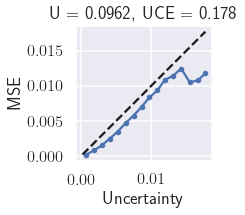

In [5]:
sns.set_context('talk')
fig, ax = plot_uncert(err, uncert, freq, outlier_freq=0.005)
fig.set_size_inches(4, 4)
ax.set_ylabel(r'MSE')
ax.set_xlabel(r'Uncertainty')
ax.set_title(f'U = {np.sqrt(uncerts.mean()):.4f}, UCE = {uce.item()*100:.3f}')
fig.savefig("calib_plot.pdf", bbox_inches='tight', pad_inches=0.01)

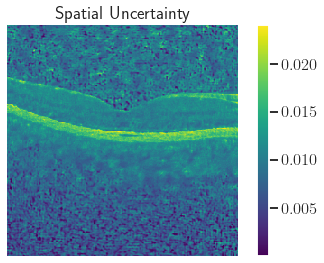

In [38]:
sns.set_context('talk')
fig, ax = plt.subplots()
im = ax.imshow(uncerts, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.axis('off')
ax.set_title('Spatial Uncertainty')
fig.tight_layout()
fig.show()
fig.savefig("uncert_map.pdf", bbox_inches='tight')

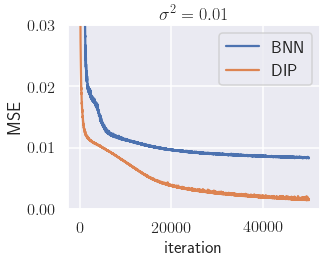

In [11]:
sns.set_context('talk')
fig, ax0 = plt.subplots(1, 1, figsize=(5,4))

from scipy.ndimage.filters import gaussian_filter1d

loss_filt = gaussian_filter1d(loss, sigma=5)
loss_n_filt = gaussian_filter1d(loss_n, sigma=5)

ax0.plot(range(len(loss_filt)), loss_filt, label='BNN')
ax0.plot(range(len(loss_n_filt)), loss_n_filt, label='DIP')
ax0.set_xlabel(r'iteration')
ax0.set_ylabel(r'MSE')
ax0.set_ylim(0,0.03)
ax0.legend()
ax0.set_title(r'$ \sigma^2 = 0.01 $')
fig.tight_layout()
fig.savefig("loss.pdf", bbox_inches='tight')

In [ ]:
plt.imsave("img_bnn.png", img[0])
plt.imsave("img_noisy.png", img_noisy[0])

In [ ]:
for i, rec in enumerate(recons):
    plt.imsave(f"./imgs_bnn/{i}.png", rec[0], cmap='gray')
    
for i, rec in enumerate(recons_n):
    plt.imsave(f"./imgs_dip/{i}.png", rec[0], cmap='gray')

In [ ]:
plt.imsave(f"./imgs_bnn/img_gt.png", img[0], cmap='gray')
plt.imsave(f"./imgs_bnn/img_noisy.png", img_noisy[0], cmap='gray')

plt.imsave(f"./imgs_dip/img_gt.png", img_n[0], cmap='gray')
plt.imsave(f"./imgs_dip/img_noisy.png", img_noisy_n[0], cmap='gray')

In [51]:
steps = 50000//500

for i in range(500):
    fig, ax = plt.subplots(1, 3, figsize=(14, 4))

    ax[0].set_xlim([-1000, 51000])
    ax[0].set_ylim([0.0, 0.03])
    ax[0].set_title(r'$ \sigma^2 = 0.01 $')
    ax[0].set_xlabel(r'iterations')
    ax[0].set_ylabel(r'MSE')
    ax[0].plot(range(len(loss_filt[:steps*i])), loss_filt[:steps*i], label='BNN')
    ax[0].plot(range(len(loss_n_filt[:steps*i])), loss_n_filt[:steps*i], label='DIP')
    ax[0].legend()

    ax[1].set_title('Baseline')
    ax[1].imshow(recons_n[i][0], cmap='gray')
    ax[1].grid(False)
    ax[1].axis('off')

    ax[2].set_title('Bayesian DIP (ours)')
    ax[2].imshow(recons[i][0], cmap='gray')
    ax[2].grid(False)
    ax[2].axis('off')

    fig.savefig(f"./bdip_anim/{i}.png", dpi=150, bbox_inches='tight')

    plt.close('all')